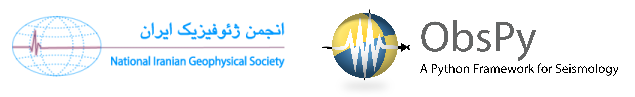
<h1><center>Iman Kahbasi</center></h1>
<h1><center>PhD student at IIEES</center></h1>
<h1><center>Seismometer Correction Or Simulation</center></h1>
<h1><center>1400-12-16</center></h1>

# Remove response

### attach response in stream

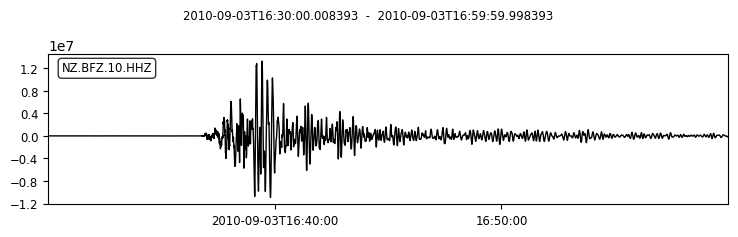

1 Trace(s) in Stream:
NZ.BFZ.10.HHZ | 2010-09-03T16:30:00.008393Z - 2010-09-03T16:59:59.998393Z | 100.0 Hz, 180000 samples


In [4]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

t1 = UTCDateTime("2010-09-3T16:30:00.000")
t2 = UTCDateTime("2010-09-3T17:00:00.000")
fdsn_client = Client('IRIS')
# Fetch waveform from IRIS FDSN web service into a ObsPy stream object
# and automatically attach correct response
st = fdsn_client.get_waveforms(network='NZ', station='BFZ', location='10',
                               channel='HHZ', starttime=t1, endtime=t2,
                               attach_response=True)
st.plot()
print(st)

In [5]:
#st.write('./sample-data/correction.mseed', format='MSEED')

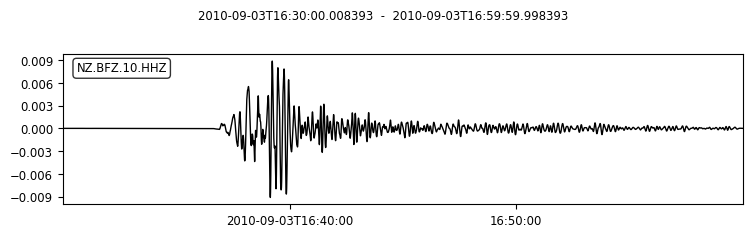

1 Trace(s) in Stream:
NZ.BFZ.10.HHZ | 2010-09-03T16:30:00.008393Z - 2010-09-03T16:59:59.998393Z | 100.0 Hz, 180000 samples


In [6]:
# define a filter band to prevent amplifying noise during the deconvolution
pre_filt = (0.005, 0.006, 30.0, 35.0)
st.remove_response(output='DISP', pre_filt=pre_filt)
st.plot()
print(st)

### Use inventory

In [18]:
from obspy import read, read_inventory

# simply use the included example waveform
st = read()
# the corresponding response is included in ObsPy as a StationXML file
inv = read_inventory()
st.plot()
print(st)

3 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


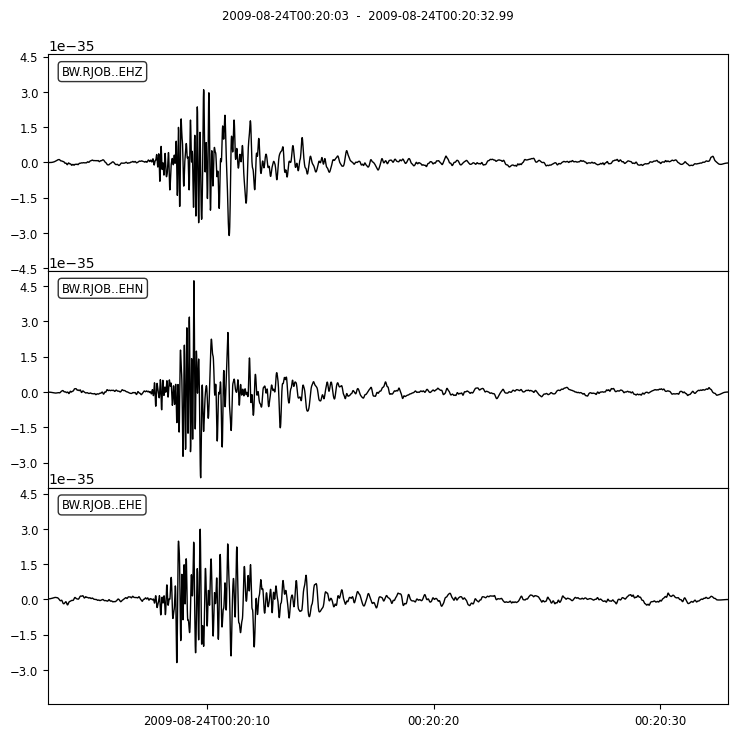

3 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


In [23]:
# the routine automatically picks the correct response for each trace
# define a filter band to prevent amplifying noise during the deconvolution
pre_filt = (0.2, 0.5, 10, 15)
st.remove_response(inventory=inv, output='VEL', pre_filt=pre_filt, water_level=60, plot=False)
st.plot()
print(st)

# Exploring
## remove_response(plot=False)

3 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples

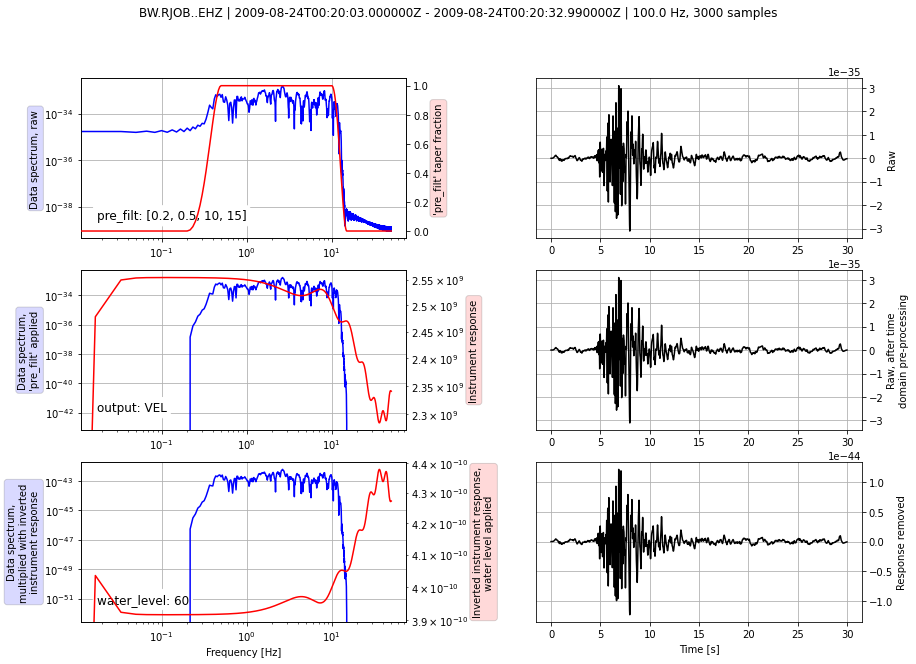

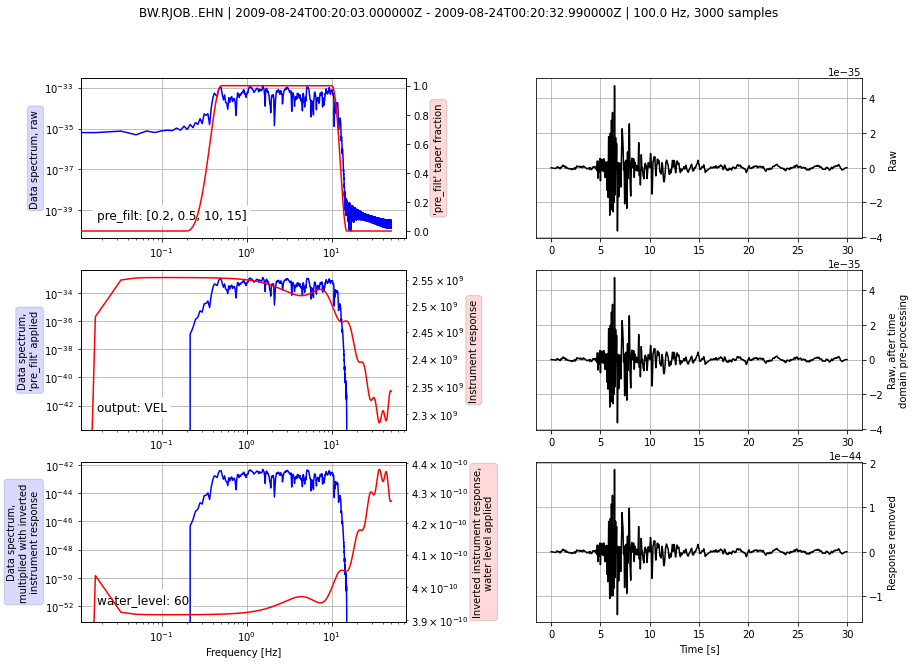

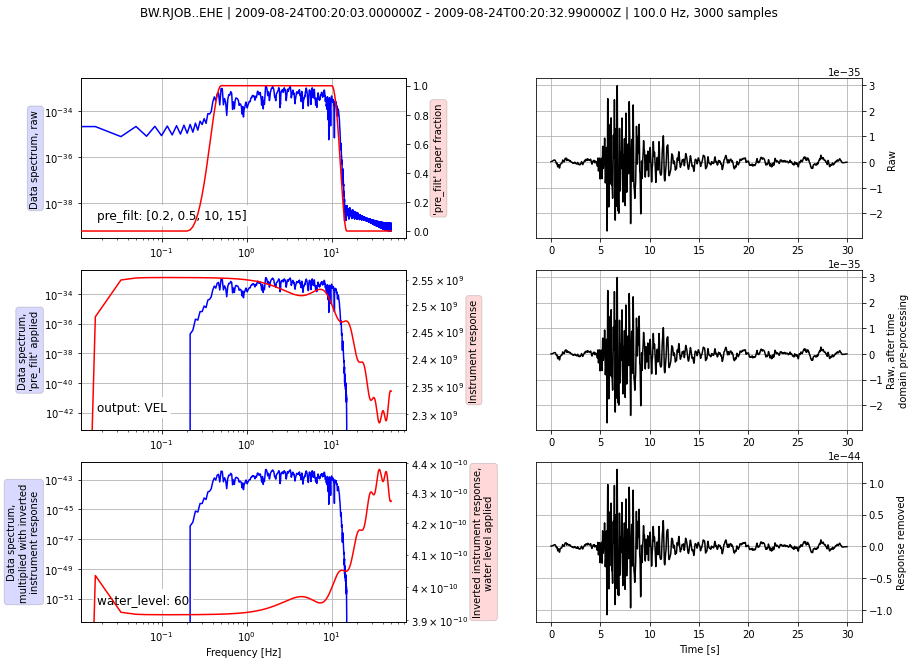

In [24]:
st.remove_response(inventory=inv, output='VEL', pre_filt=pre_filt, water_level=60, plot=True)

# 14.1.2. ..using a RESP file¶

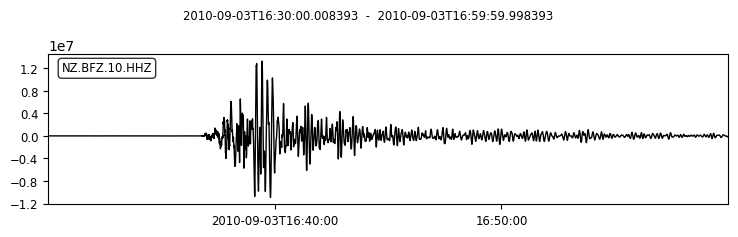

1 Trace(s) in Stream:
NZ.BFZ.10.HHZ | 2010-09-03T16:30:00.008393Z - 2010-09-03T16:59:59.998393Z | 100.0 Hz, 180000 samples


In [27]:
import matplotlib.pyplot as plt

import obspy
from obspy.core.util import NamedTemporaryFile
from obspy.clients.fdsn import Client as FDSN_Client
from obspy.clients.iris import Client as OldIris_Client

from obspy import read
st = read('./sample-data/correction1.mseed')
st.plot()
print(st)

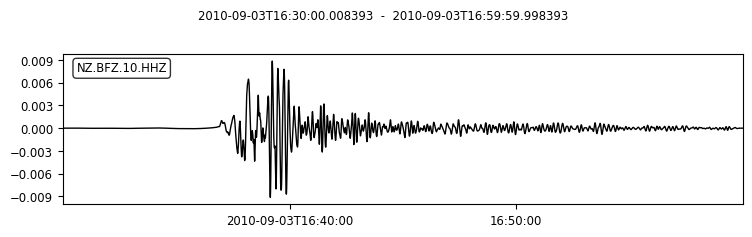

1 Trace(s) in Stream:
NZ.BFZ.10.HHZ | 2010-09-03T16:30:00.008393Z - 2010-09-03T16:59:59.998393Z | 100.0 Hz, 180000 samples


In [28]:
# define a filter band to prevent amplifying noise during the deconvolution
pre_filt = (0.005, 0.006, 30.0, 35.0)

# this can be the date of your raw data or any date for which the
# SEED RESP-file is valid
date = t1

seedresp = {'filename': './sample-data/correction1.RESP',  # RESP filename
            'units'   : 'DIS'                              # Units to return response in ('DIS', 'VEL' or ACC)
            }

# Remove instrument response using the information from the given RESP file
st.simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp)
st.plot()
print(st)

# 14.1.3. ..using a Dataless/Full SEED file (or XMLSEED file)¶

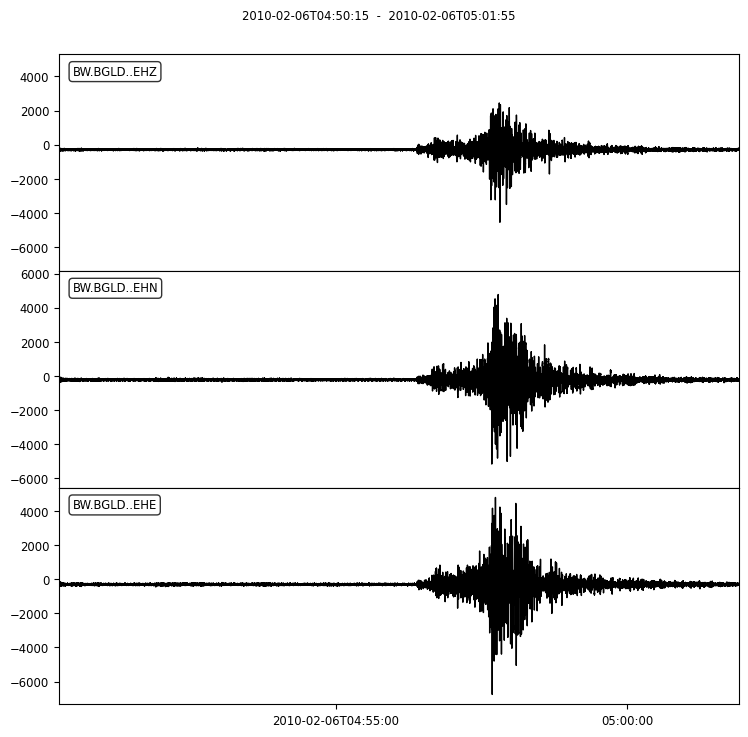

3 Trace(s) in Stream:
BW.BGLD..EHE | 2010-02-06T04:50:15.000000Z - 2010-02-06T05:01:55.000000Z | 200.0 Hz, 140001 samples
BW.BGLD..EHN | 2010-02-06T04:50:15.000000Z - 2010-02-06T05:01:55.000000Z | 200.0 Hz, 140001 samples
BW.BGLD..EHZ | 2010-02-06T04:50:15.000000Z - 2010-02-06T05:01:55.000000Z | 200.0 Hz, 140001 samples


In [38]:
import obspy
from obspy.io.xseed import Parser


st = obspy.read('./sample-data/correction2.mseed')
parser = Parser("./sample-data/correction2.seed.BW_BGLD")

st.plot()
print(st)

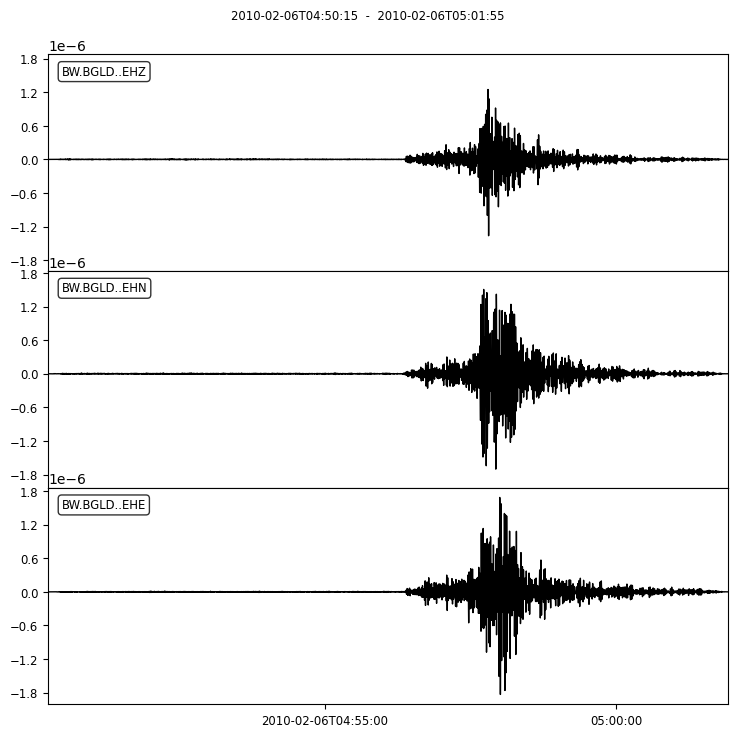

3 Trace(s) in Stream:
BW.BGLD..EHE | 2010-02-06T04:50:15.000000Z - 2010-02-06T05:01:55.000000Z | 200.0 Hz, 140001 samples
BW.BGLD..EHN | 2010-02-06T04:50:15.000000Z - 2010-02-06T05:01:55.000000Z | 200.0 Hz, 140001 samples
BW.BGLD..EHZ | 2010-02-06T04:50:15.000000Z - 2010-02-06T05:01:55.000000Z | 200.0 Hz, 140001 samples


In [39]:
pre_filt = (0.5, 0.8, 30.0, 35.0)

st.simulate(seedresp={'filename': parser, 'units': "DIS"},
            pre_filt=pre_filt)
st.plot()
print(st)

# 14.2. Using a PAZ dictionary

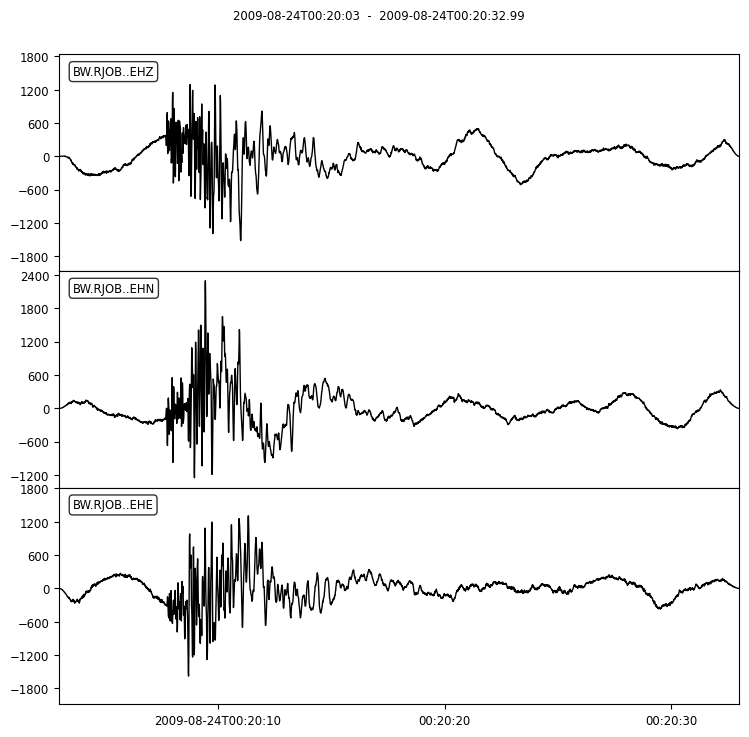

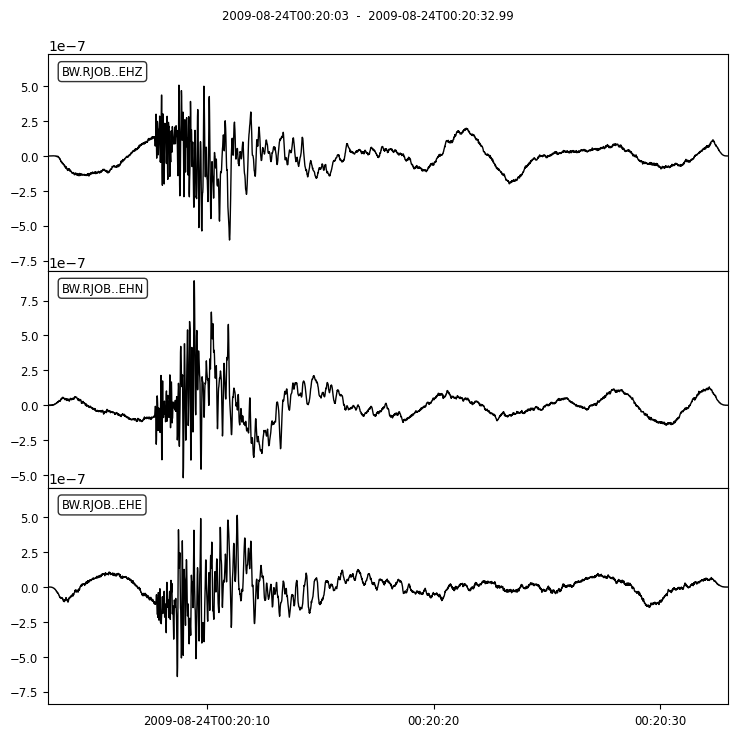

In [40]:
import obspy
from obspy.signal.invsim import corn_freq_2_paz


paz_sts2 = {'poles': [-0.037004 + 0.037016j,
                      -0.037004 - 0.037016j,
                      -251.33 + 0j,
                      - 131.04 - 467.29j,
                      -131.04 + 467.29j],
            'zeros': [0j, 0j],
            'gain': 60077000.0,
            'sensitivity': 2516778400.0}

st = obspy.read()
# make a copy to keep our original data
st_orig = st.copy()

# Simulate instrument given poles, zeros and gain of
# the original and desired instrument
st.simulate(paz_remove=paz_sts2)

# plot original and simulated data
st_orig.plot()
st.plot()
print()